In [1]:
import pandas as pd

# Classification

We'll take a tour of the methods for classification in sklearn. First let's load a toy dataset to use:

In [2]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

Let's take a look

In [3]:
# Convert it to a dataframe for better visuals
df = pd.DataFrame(breast.data)
df.columns = breast.feature_names
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


And now look at the targets

In [4]:
print(breast.target_names)
breast.target

['malignant' 'benign']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Classification Trees

Using the scikit learn models is basically the same as in Julia's ScikitLearn.jl

In [5]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth=2, min_samples_leaf=140)
cart.fit(breast.data, breast.target)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=140)

Here's a helper function to plot the trees.

# Installing Graphviz (tedious)

## Windows

1. Download graphviz from https://graphviz.gitlab.io/_pages/Download/Download_windows.html
2. Install it by running the .msi file
3. Set the pat variable:
    (a) Go to Control Panel > System and Security > System > Advanced System Settings >  Environment Variables > Path > Edit
    (b) Add 'C:\Program Files (x86)\Graphviz2.38\bin'
4. Run `conda install graphviz`
5. Run `conda install python-graphviz`

## macOS and Linux

1. Run `brew install graphviz` (install `brew` from https://docs.brew.sh/Installation if you don't have it)
2. Run `conda install graphviz`
3. Run `conda install python-graphviz`


In [7]:
import graphviz
import sklearn.tree
def visualize_tree(sktree):
    dot_data = sklearn.tree.export_graphviz(sktree, out_file=None, 
                                    filled=True, rounded=True,  
                                    special_characters=False,
                                    feature_names=df.columns)
    return graphviz.Source(dot_data)

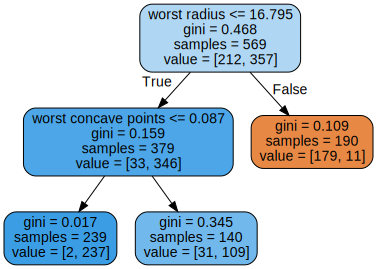

In [8]:
visualize_tree(cart)

We can get the label predictions with the `.predict` method

In [9]:
labels = cart.predict(breast.data)
labels

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

And similarly the predicted probabilities with `.predict_proba`

In [10]:
probs = cart.predict_proba(breast.data)
probs

array([[0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       ...,
       [0.94210526, 0.05789474],
       [0.94210526, 0.05789474],
       [0.0083682 , 0.9916318 ]])

Just like in Julia, the probabilities are returned for each class

In [11]:
probs.shape

(569, 2)

We can extract the second column of the probs by slicing, just like how we did it in Julia

In [12]:
probs = cart.predict_proba(breast.data)[:,1]
probs

array([0.05789474, 0.05789474, 0.05789474, 0.77857143, 0.05789474,
       0.77857143, 0.05789474, 0.05789474, 0.77857143, 0.77857143,
       0.05789474, 0.05789474, 0.05789474, 0.05789474, 0.77857143,
       0.05789474, 0.05789474, 0.05789474, 0.05789474, 0.77857143,
       0.9916318 , 0.9916318 , 0.05789474, 0.05789474, 0.05789474,
       0.05789474, 0.05789474, 0.05789474, 0.05789474, 0.05789474,
       0.05789474, 0.05789474, 0.05789474, 0.05789474, 0.05789474,
       0.05789474, 0.77857143, 0.9916318 , 0.9916318 , 0.77857143,
       0.77857143, 0.77857143, 0.05789474, 0.05789474, 0.77857143,
       0.05789474, 0.9916318 , 0.77857143, 0.9916318 , 0.77857143,
       0.9916318 , 0.9916318 , 0.9916318 , 0.05789474, 0.05789474,
       0.9916318 , 0.05789474, 0.05789474, 0.9916318 , 0.9916318 ,
       0.9916318 , 0.9916318 , 0.05789474, 0.9916318 , 0.05789474,
       0.05789474, 0.9916318 , 0.9916318 , 0.77857143, 0.9916318 ,
       0.05789474, 0.9916318 , 0.05789474, 0.77857143, 0.99163

To evaluate the model, we can use functions from `sklearn.metrics`

In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [16]:
roc_auc_score(breast.target, probs)

0.9538607895988584

In [17]:
accuracy_score(breast.target, labels)

0.9226713532513181

In [18]:
confusion_matrix(breast.target, labels)

array([[179,  33],
       [ 11, 346]], dtype=int64)

In [52]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

C:\Users\omars\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.91it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.05
Perceptron,0.99,0.98,0.98,0.99,0.02
LogisticRegression,0.99,0.98,0.98,0.99,0.13
SVC,0.98,0.98,0.98,0.98,0.03
XGBClassifier,0.98,0.98,0.98,0.98,0.11
LabelPropagation,0.98,0.97,0.97,0.98,0.03
LabelSpreading,0.98,0.97,0.97,0.98,0.05
BaggingClassifier,0.97,0.97,0.97,0.97,0.10
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.07


## Random Forests and Boosting

We use random forests and boosting in the same way as CART

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(breast.data, breast.target)

RandomForestClassifier()

In [20]:
labels = forest.predict(breast.data)
probs = forest.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

1.0
1.0


array([[212,   0],
       [  0, 357]], dtype=int64)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
boost.fit(breast.data, breast.target)

GradientBoostingClassifier()

In [22]:
labels = boost.predict(breast.data)
probs = boost.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

1.0
1.0


array([[212,   0],
       [  0, 357]], dtype=int64)

In [23]:
#!pip install xgboost
from xgboost import XGBClassifier
boost2 = XGBClassifier()
boost2.fit(breast.data, breast.target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
labels = boost2.predict(breast.data)
probs = boost2.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

1.0
1.0


array([[212,   0],
       [  0, 357]], dtype=int64)

## Neural Networks

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(breast.data, breast.target)

MLPClassifier(max_iter=1000)

In [26]:
labels = mlp.predict(breast.data)
probs = mlp.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

0.993235029861001
0.9490333919156415


array([[187,  25],
       [  4, 353]], dtype=int64)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
X = breast.data
Y = breast.target
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(Y)
 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=30, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=16, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
29/29 [==============================] - 0s 6ms/step - loss: 36.4088 - accuracy: 0.3516
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 17.8082 - accuracy: 0.3758
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 15.4570 - accuracy: 0.4352
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 12.8511 - accuracy: 0.4769
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 10.6894 - accuracy: 0.5319
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 9.3079 - accuracy: 0.5670
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 8.3241 - accuracy: 0.5824
Epoch 8/10
29/29 [==============================] - 0s 5ms/step - loss: 7.3370 - accuracy: 0.6264
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: 6.6161 - accuracy: 0.6154
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 5.7604 - accuracy: 0.6491
Epoch 1/10
29/29

## Logistic Regression

We can also access logistic regression from sklearn

In [30]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='liblinear')
logit.fit(breast.data, breast.target)

LogisticRegression(solver='liblinear')

In [31]:
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

0.9945298874266688
0.9578207381370826


array([[197,  15],
       [  9, 348]], dtype=int64)

The sklearn implementation has options for regularization in logistic regression. You can choose between L1 and L2 regularization:

![](http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png)


![](http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png)

Note that this regularization is adhoc and **not equivalent to robustness**. For a robust logistic regression, follow the approach from 15.680.

You control the regularization with the `penalty` and `C` hyperparameters. We can see that our model above used L2 regularization with $C=1$.

### Exercise

Try out unregularized logistic regression as well as L1 regularization. Which of the three options seems best? What if you try changing $C$?

In [32]:
# No regularization
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(breast.data, breast.target)
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

0.996789281750436
0.9718804920913884


array([[202,  10],
       [  6, 351]], dtype=int64)

In [33]:
# L1 regularization
logit = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logit.fit(breast.data, breast.target)
labels = logit.predict(breast.data)
probs = logit.predict_proba(breast.data)[:,1]
print(roc_auc_score(breast.target, probs))
print(accuracy_score(breast.target, labels))
confusion_matrix(breast.target, labels)

0.9985201627820939
0.9876977152899824


array([[207,   5],
       [  2, 355]], dtype=int64)

# Regression

Now let's take a look at regression in sklearn. Again we can start by loading up a dataset.

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Take a look at the X

In [35]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Regression Trees

We use regression trees in the same way as classification

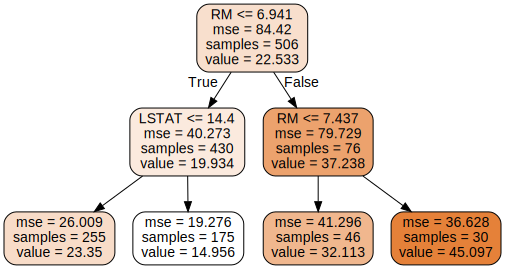

In [37]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)
cart.fit(boston.data, boston.target)
visualize_tree(cart)

Like for classification, we get the predicted labels out with the `.predict` method

In [38]:
preds = cart.predict(boston.data)
preds

array([23.34980392, 23.34980392, 32.11304348, 32.11304348, 32.11304348,
       23.34980392, 23.34980392, 14.956     , 14.956     , 14.956     ,
       14.956     , 23.34980392, 14.956     , 23.34980392, 23.34980392,
       23.34980392, 23.34980392, 14.956     , 23.34980392, 23.34980392,
       14.956     , 23.34980392, 14.956     , 14.956     , 14.956     ,
       14.956     , 14.956     , 14.956     , 23.34980392, 23.34980392,
       14.956     , 23.34980392, 14.956     , 14.956     , 14.956     ,
       23.34980392, 23.34980392, 23.34980392, 23.34980392, 23.34980392,
       32.11304348, 23.34980392, 23.34980392, 23.34980392, 23.34980392,
       23.34980392, 23.34980392, 14.956     , 14.956     , 14.956     ,
       23.34980392, 23.34980392, 23.34980392, 23.34980392, 14.956     ,
       32.11304348, 23.34980392, 23.34980392, 23.34980392, 23.34980392,
       23.34980392, 14.956     , 23.34980392, 23.34980392, 32.11304348,
       23.34980392, 23.34980392, 23.34980392, 23.34980392, 23.34

There are functions provided by `sklearn.metrics` to evaluate the predictions

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

3.5736909785051676
25.69946745212606
0.695574477973027


## Random Forests and Boosting

Random forests and boosting for regression work the same as in classification, except we use the `Regressor` version rather than `Classifier`.

### Exercise

Test and compare the (in-sample) performance of random forests and boosting on the Boston data with some sensible parameters.

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)
forest.fit(boston.data, boston.target)
preds = forest.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

0.8015256916996039
1.403098794466401
0.9833794578134142


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
boost.fit(boston.data, boston.target)
preds = boost.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

0.772623394132104
0.9809578962773967
0.9883799685648341


In [43]:
from xgboost import XGBRegressor
boost2 = XGBRegressor()
boost2.fit(boston.data, boston.target)
preds = boost2.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

0.026413507235379965
0.0014430003436840648
0.9999829068001611


## Neural Networks

In [44]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000)
mlp.fit(boston.data, boston.target)

MLPRegressor(max_iter=1000)

In [45]:
preds = mlp.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

2.778925080695003
15.118711213942651
0.8209098471688843


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
X = boston.data
Y = boston.target
 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=16, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Mean Squared Error: %.2f (%.2f)" % (abs(results.mean()), results.std()))

Epoch 1/10
26/26 [==============================] - 0s 2ms/step - loss: 416.3250
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 189.9820
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 147.3391
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 123.4213
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 101.8594
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 86.1179
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 76.7525: 0s - loss: 74.
Epoch 8/10
26/26 [==============================] - 0s 5ms/step - loss: 71.9598
Epoch 9/10
26/26 [==============================] - 0s 5ms/step - loss: 68.5318
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 68.3569
Epoch 1/10
26/26 [==============================] - 0s 4ms/step - loss: 229.8424
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: 152.8784
Epoch 3/10
26/26 [

## Linear Regression Models

There are a large collection of linear regression models in sklearn. Let's start with a simple ordinary linear regression

In [47]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(boston.data, boston.target)
preds = linear.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))

3.270862810900317
21.894831181729206
0.7406426641094094


We can also take a look at the betas:

In [48]:
linear.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

We can use regularized models as well. Here is ridge regression:

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(boston.data, boston.target)
preds = ridge.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))
ridge.coef_

3.315169248123664
22.660363555639318
0.7315744764907257


array([-0.10143535,  0.0495791 , -0.0429624 ,  1.95202082, -2.37161896,
        3.70227207, -0.01070735, -1.24880821,  0.2795956 , -0.01399313,
       -0.79794498,  0.01003684, -0.55936642])

And here is lasso

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(boston.data, boston.target)
preds = lasso.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))
lasso.coef_

3.6117102456478434
26.79609915726647
0.6825842212709925


array([-0.06343729,  0.04916467, -0.        ,  0.        , -0.        ,
        0.9498107 ,  0.02090951, -0.66879   ,  0.26420643, -0.01521159,
       -0.72296636,  0.00824703, -0.76111454])

There are many other linear regression models available. See the [linear model documentation](http://scikit-learn.org/stable/modules/linear_model.html) for more.

### Exercise

The elastic net is another linear regression method that combines ridge and lasso regularization. Try running it on this dataset, referring to the documentation as needed to learn how to use it and control the hyperparameters.

In [49]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1, l1_ratio=.7)
elastic.fit(boston.data, boston.target)
preds = elastic.predict(boston.data)
print(mean_absolute_error(boston.target, preds))
print(mean_squared_error(boston.target, preds))
print(r2_score(boston.target, preds))
elastic.coef_

3.6003900945410816
26.61250550876538
0.6847589975534153


array([-0.07357712,  0.05213586, -0.        ,  0.        , -0.        ,
        0.93878931,  0.02034843, -0.72517373,  0.28929928, -0.01621831,
       -0.73867242,  0.00831955, -0.76045672])

In [51]:
?DecisionTreeClassifier